In [1]:
# Load Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import time
import gc

In [4]:
sales_dat = pd.read_csv(os.getcwd()+'\sales_dir\sales_data.csv')

In [5]:
sales_dat.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Markdown_total,month
0,1,1,2012-01-06,16567.69,0,49.01,3.157,219.714258,7.348,151315,1,0,0,38166.78,1
1,1,1,2012-01-13,16894.40,0,48.53,3.261,219.892526,7.348,151315,1,0,0,17423.86,1
2,1,1,2012-01-20,18365.10,0,54.11,3.268,219.985689,7.348,151315,1,0,0,10881.77,1
3,1,1,2012-01-27,18378.16,0,54.26,3.290,220.078852,7.348,151315,1,0,0,3524.39,1
4,1,1,2012-02-03,23510.49,0,56.55,3.360,220.172015,7.348,151315,1,0,0,76351.07,2


In [6]:
sales_dat.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'Markdown_total', 'month'],
      dtype='object')

In [7]:
sales_dat.dtypes

Store               int64
Dept                int64
Date               object
Weekly_Sales      float64
IsHoliday           int64
Temperature       float64
Fuel_Price        float64
CPI               float64
Unemployment      float64
Size                int64
Type_A              int64
Type_B              int64
Type_C              int64
Markdown_total    float64
month               int64
dtype: object

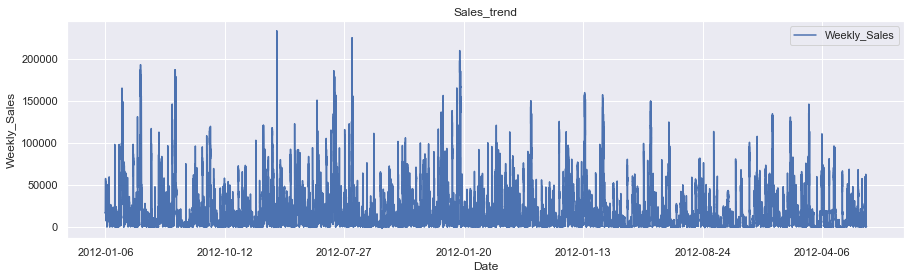

In [9]:
# How does the sales look without the markdowns?

ax = sales_dat[['Date','Weekly_Sales']].plot(x ='Date', figsize = (15,4))
ax.set_title('Sales_trend')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly_Sales')
plt.show()

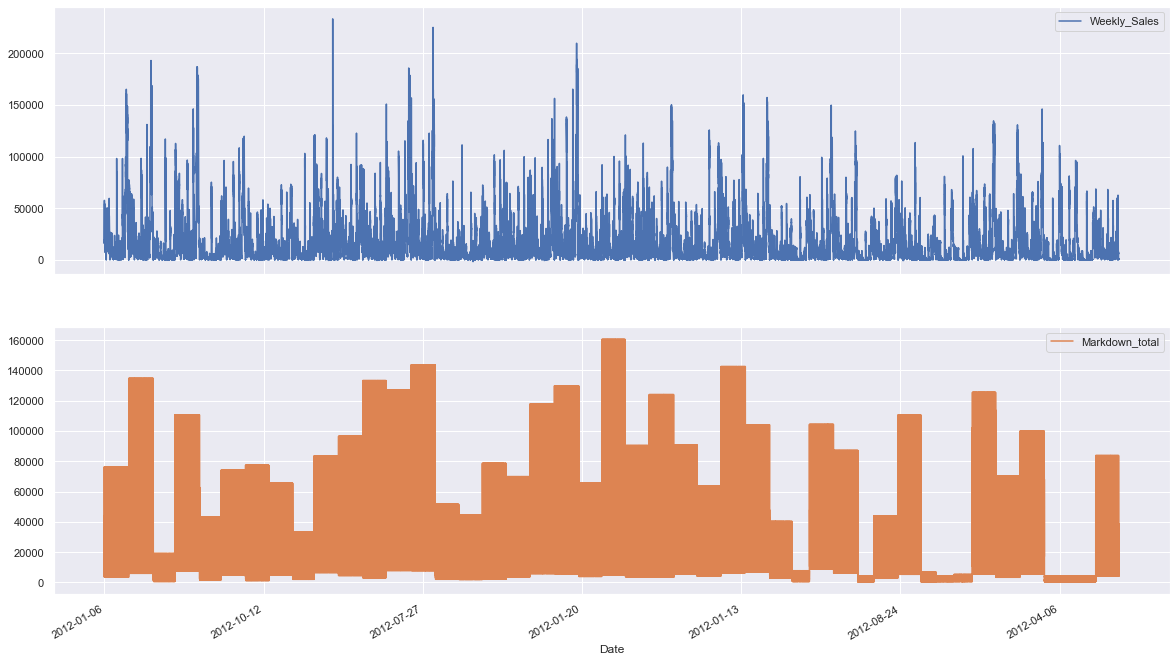

In [10]:
sales_dat[['Date','Weekly_Sales','Markdown_total']].plot(x ='Date',subplots = True, figsize = (20,12))
plt.show()

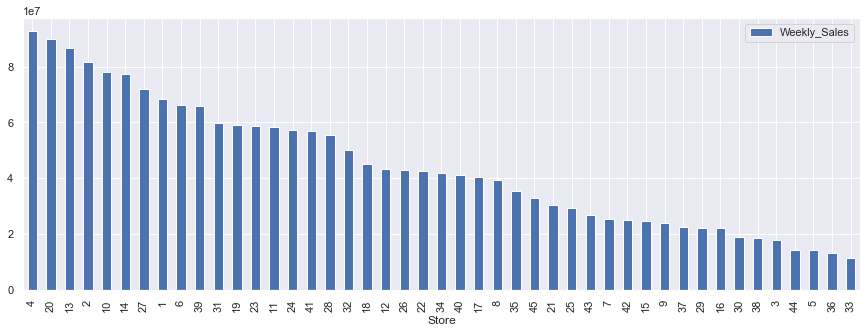

In [12]:
# Impact of store and dept as id variables.These should also be dummy coded. See how big the sales wrt store and dept.

storesnsales = sales_dat.groupby(by = ['Store'], as_index = False)["Weekly_Sales"].sum()
s = storesnsales.sort_values(by = "Weekly_Sales",ascending = False)
s.plot.bar(x = 'Store', figsize = (15,5))
plt.show()

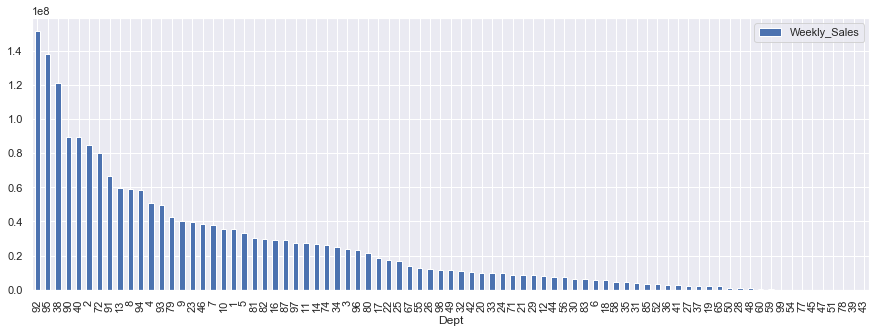

In [13]:
deptnsales = sales_dat.groupby(by = ['Dept'], as_index = False)["Weekly_Sales"].sum()
d = deptnsales.sort_values(by = 'Weekly_Sales',ascending = False)
d.plot.bar(x = 'Dept', figsize = (15,5))
plt.show()

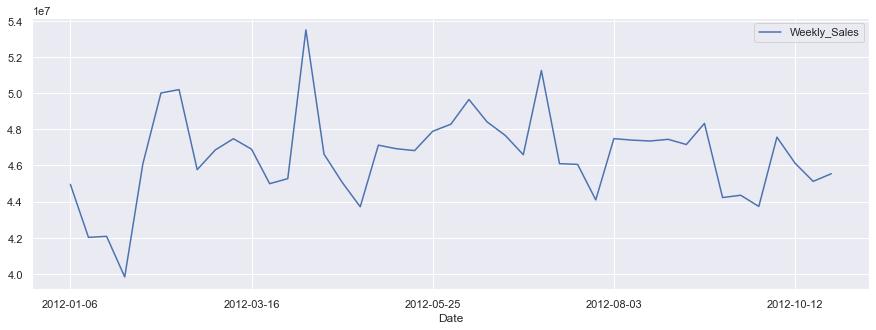

In [15]:
# Date trend

datensales = sales_dat.groupby(by = ['Date'], as_index = False)["Weekly_Sales"].sum()
datensales.plot(x = 'Date', figsize = (15,5))
plt.show()

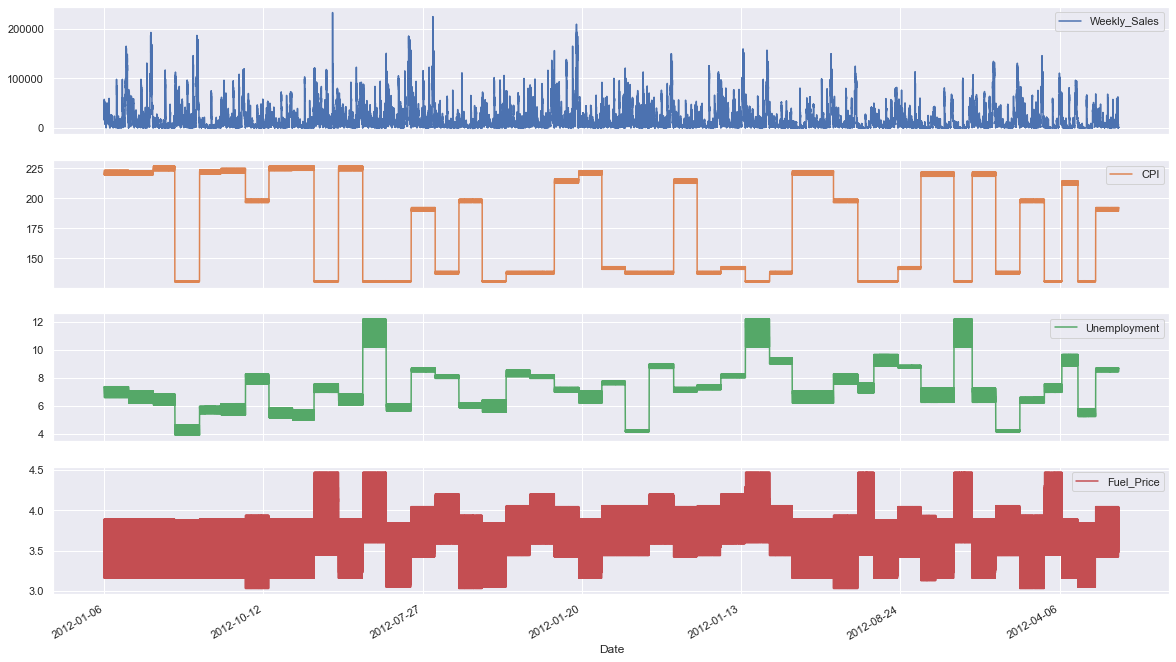

In [16]:
# CPI, Unemployment, Fuel Price

sales_dat[['Date','Weekly_Sales','CPI','Unemployment','Fuel_Price']].plot(x = 'Date',subplots = True, figsize = (20,12))
plt.show()

Store            -0.087231
Weekly_Sales      1.000000
Dept              0.163633
IsHoliday         0.007871
Temperature       0.015335
Fuel_Price        0.007246
CPI              -0.017729
Unemployment     -0.035691
Size              0.246877
Type_A            0.190577
Type_B           -0.137269
Type_C           -0.093383
Markdown_total    0.118702
Name: Weekly_Sales, dtype: float64

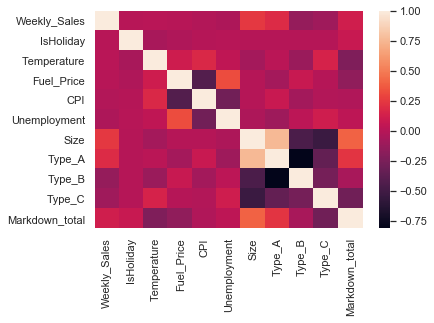

In [17]:
# Correlation

sns.heatmap(sales_dat[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price','CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'Markdown_total']].corr())
sales_dat[['Store','Weekly_Sales', 'Dept', 'IsHoliday', 'Temperature',
       'Fuel_Price','CPI', 'Unemployment', 'Size', 'Type_A', 'Type_B',
       'Type_C', 'Markdown_total']].corr()['Weekly_Sales']

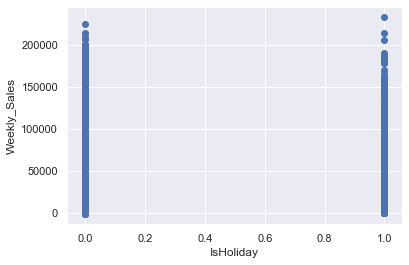

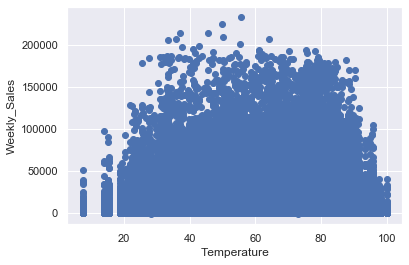

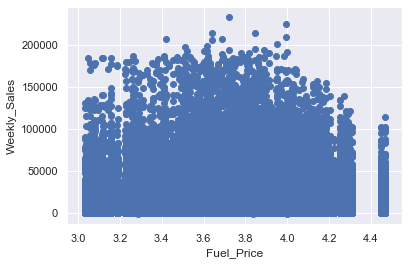

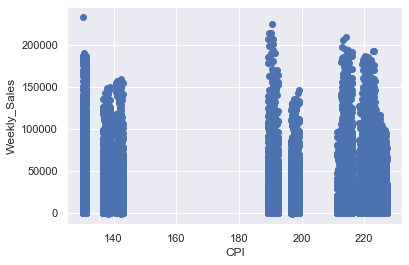

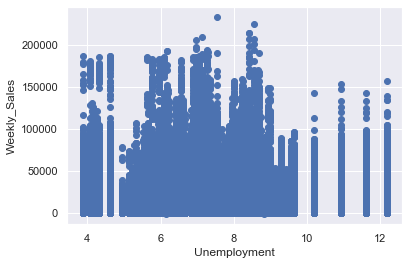

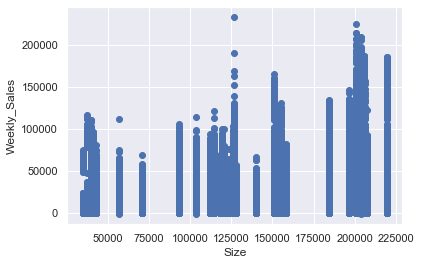

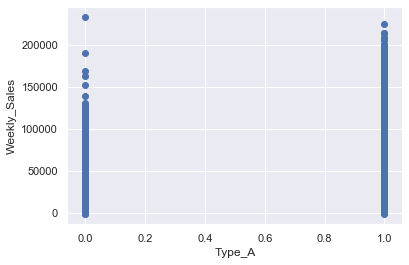

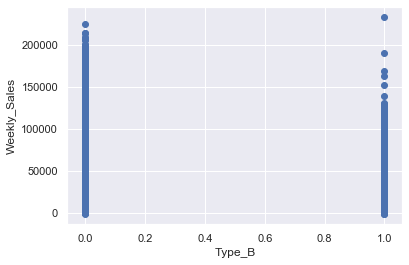

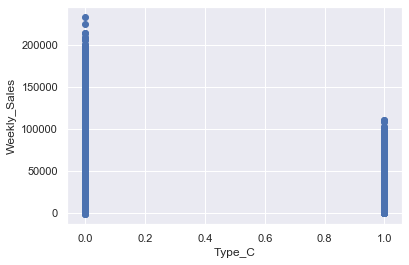

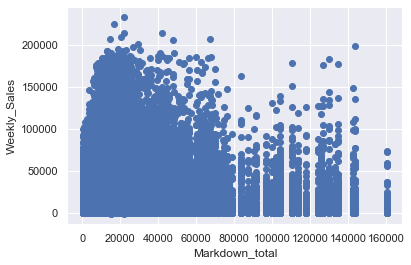

In [21]:
# scatter plot

for i in sales_dat.columns:
    if i not in ['Weekly_Sales','Id','Store','Dept','Date','month']:
        plt.figure()
        y = sales_dat['Weekly_Sales']
        plt.scatter(sales_dat[i],y)
        plt.xlabel(i)
        plt.ylabel('Weekly_Sales')

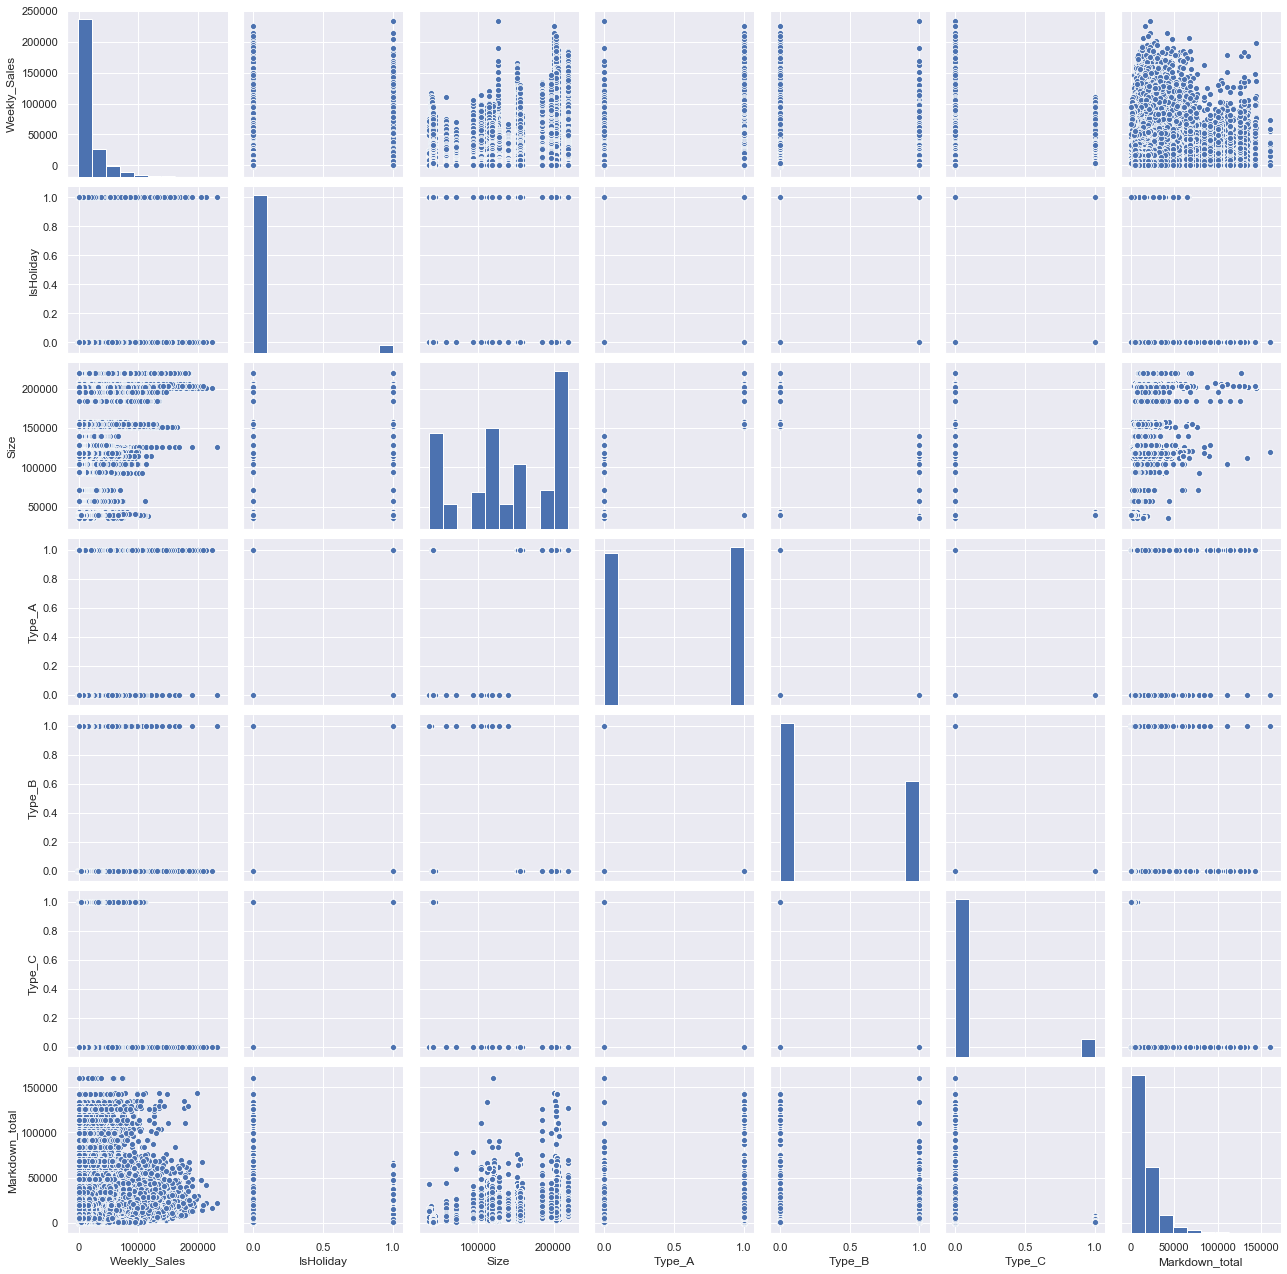

In [19]:
sns.pairplot(sales_dat, vars=['Weekly_Sales', 'IsHoliday', 'Size', 'Type_A', 'Type_B','Type_C', 'Markdown_total'])

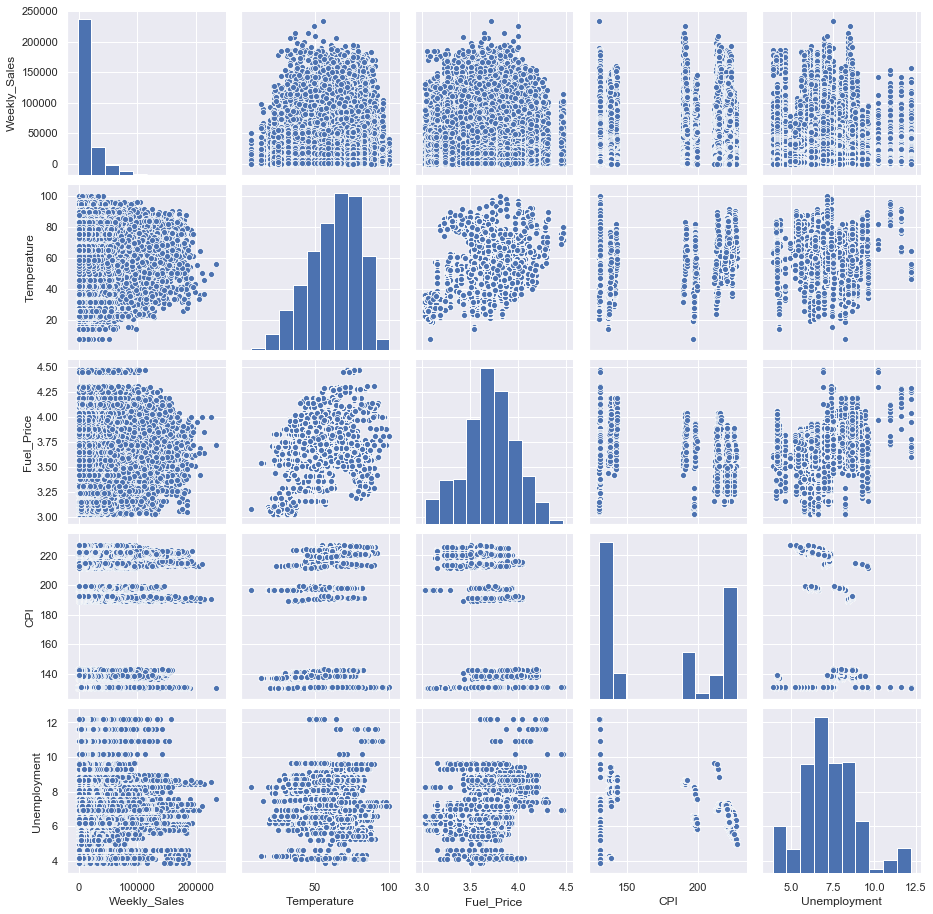

In [20]:
sns.pairplot(sales_dat, vars=['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment'])